In [1]:
#Author: Walter Nam
import numpy as np
import math
from scipy.interpolate import griddata
from numpy.random import uniform, seed
from numpy import array
import matplotlib.pyplot as plt
from matplotlib import cm

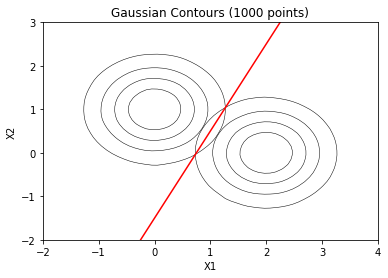

Class 1 =================
[0.5 2. ]
[-0.33333333  1.16666667]
-2.181945622001443
#Class 2 ================
[2.  0.5]
[ 1.16666667 -0.33333333]
-2.181945622001443
Class 3 ==================
[3.5 3.5]
[1.16666667 1.16666667]
-5.181945622001443


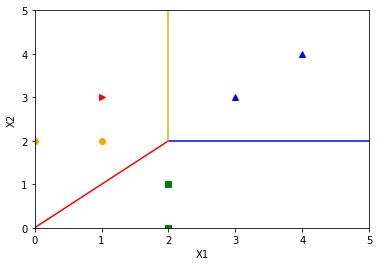

In [2]:
def feature_vector(x1, x2):
    return np.array([x1, x2]).transpose()

mu_i = feature_vector(0, 1) # mu vector for class 1
mu_j = feature_vector(2, 0) # mu vector for class 2
sigma = np.array([[1,0],[0,1]]) #covariance matrix

def gaussian_dist(x1, x2, sigma, mu):
    featurev = np.vstack((x1,x2)).T
    return np.diag(np.exp(-1*(np.dot((featurev-mu[None,...]).dot(np.linalg.inv(sigma)),(featurev-mu[None,...]).T))))

def plot_contour(x,y,z):
    # define grid.
    x1 = np.linspace(-5, 5, 100)
    x2 = np.linspace(-5, 5, 100)
    z = griddata((x, y), z, (x1[None,:], x2[:,None]), method='cubic')
    levels = [0.2, 0.4, 0.6, 0.8, 1.0]
    CS = plt.contour(x1,x2,z,linewidths=0.5,colors='k', levels = levels)
    
seed(1234)
npts = 1000
x1 = uniform(-4, 4, npts)
x2 = uniform(-4, 4, npts)
class_1 = gaussian_dist(x1,x2, sigma, mu_i)
class_2 = gaussian_dist(x1,x2, sigma, mu_j)
plot_contour(x1,x2,class_1)
plot_contour(x1,x2, class_2)
#plt.colorbar() 
plt.xlim(-2, 4)
plt.ylim(-2, 3)
x1 = np.linspace(-5,5,100)
x2 = -0.5*(3-4*x1)
plt.plot(x1, x2, 'r')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Gaussian Contours (%d points)' % npts)
plt.show()

#Second Plot --------------------------------------------------------------

#Class 1
x1 = feature_vector(0,2)
x2 = feature_vector(1,2)
#Class 2
x3 = feature_vector(2,0)
x4 = feature_vector(2,1)
#Class 3
x5 = feature_vector(3,3)
x6 = feature_vector(4,4)

y = np.array([1,1,2,2,3,3])

def calculate_mu(vector1, vector2):
    return 0.5*(vector1 + vector2)

def calculate_wi(cov, mu):
    return np.matmul(np.linalg.inv(cov), mu)

def calculate_wi0(mu, cov, Pwi):
    wi = calculate_wi(cov, mu)
    return -0.5*np.matmul(mu, wi) + np.log(Pwi)

input = np.array([x1, x2, x3, x4, x5, x6])
sigma = np.cov(input.transpose())

#discriminant 1
mu_1 = calculate_mu(x1, x2)
w1_0 = calculate_wi0(mu_1, sigma, 1/3)
w1 = calculate_wi(sigma, mu_1)

# Class 1 
print("Class 1 =================")
print(mu_1)
print(w1)
print(w1_0)

# Class 2
mu_2 = calculate_mu(x3, x4)
w2_0 = calculate_wi0(mu_2, sigma, 1/3)
w2 = calculate_wi(sigma, mu_2)

print("#Class 2 ================")
print(mu_2)
print(w2)
print(w2_0)

#Class 3
print("Class 3 ==================")
mu_3 = calculate_mu(x5, x6)
w3_0 = calculate_wi0(mu_3, sigma, 1/3)
w3 = calculate_wi(sigma, mu_3)

print(mu_3)
print(w3)
print(w3_0)

#plotting the boundaries
plt.xlim(0,5)
plt.ylim(0,5)
#Boundary 1
x1 = np.linspace(0,2.0,100)
bound1 = x1
line = plt.plot(x1, bound1, 'r')

#Boundary 2
plt.axhline(y = 2.0, color='b', linestyle='-', xmin = 2.0/5.0)

#Boundary 3
plt.axvline(x = 2.0, color = 'y', linestyle = '-', ymin = 2.0/5.0)

#Plotting the classes and boundaries
plt.xlabel('X1')
plt.ylabel('X2')
plt.plot(0,2,color = 'orange', marker = 'o')
plt.plot(1,2,color = 'orange', marker = 'o')
plt.plot(2,0,color = 'green', marker = 's')
plt.plot(2,1,color = 'green', marker = 's')
plt.plot(3,3,color = 'blue', marker = '^')
plt.plot(4,4,color = 'blue', marker = '^')
plt.plot(1,3,color = 'red', marker = '>' )
plt.show()